# ***SCRAPPING DATA***




In [3]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.1 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

google_play_scraper: Library ini digunakan untuk mengambil informasi aplikasi dan ulasan dari Google Play Store. pandas: Digunakan untuk bekerja dengan data dalam format DataFrame. datetime: Digunakan untuk menentukan rentang waktu (start_date dan end_date).

In [4]:
from google_play_scraper import reviews, Sort

app_id = 'id.co.bitcoin'

def get_reviews(app_id, lang='id', count=1000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )

        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews, continuation_token = get_reviews(app_id)

if reviews is not None:
    print("Jumlah ulasan:", len(reviews))
    if len(reviews) > 0:
        print("Contoh ulasan:")
        print(reviews[0])
else:
    print("Tidak dapat mengambil ulasan.")


Jumlah ulasan: 1000
Contoh ulasan:
{'reviewId': '6b70c687-0ea8-4f6f-af70-7b3b2dc65a2b', 'userName': 'Eva Nur Diana', 'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjXf9Gl3GypviUHNQJ8BB_-UAenF4AWqHB_264F1-xblBmAhg1GM', 'content': 'Saya sudah menggunakan aplikasi Indodax 3.0 selama beberapa bulan, dan pengalaman saya sangat positif. Antarmukanya intuitif, sehingga mudah digunakan bahkan untuk pemula seperti saya. Proses pendaftaran cepat dan tidak ribet. Saya suka banyaknya pilihan aset digital yang tersedia. Saya bisa diversifikasi investasi dengan Bitcoin, Ethereum, dan banyak altcoin lainnya. Informasi pasar yang selalu diperbarui juga sangat membantu saya dalam mengambil keputusan. Username: ozevadiana #AsetMasaDepan', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '5.3.8', 'at': datetime.datetime(2024, 10, 10, 5, 6, 41), 'replyContent': 'Dear member INDODAX, terima kasih telah mengikuti event kami. Mohon menunggu informasi lebih lanjut terkait pemenang event pa

In [9]:
import csv

def export_to_csv(reviews, file_name='skripsi_hasil_scraper_ulasan_app.csv'):
    if reviews:
        fieldnames = ['Review ID', 'Username', 'Rating', 'Review Text', 'Date']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'Review ID': review['reviewId'],
                    'Username': review['userName'],
                    'Rating': review['score'],
                    'Review Text': review['content'],
                    'Date': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews)


Data berhasil diekspor ke 'skripsi_hasil_scraper_ulasan_app.csv'


In [10]:
import pandas as pd

data = pd.read_csv("skripsi_hasil_scraper_ulasan_app.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1000 non-null   object
 1   Username     1000 non-null   object
 2   Rating       1000 non-null   int64 
 3   Review Text  1000 non-null   object
 4   Date         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [8]:
data.head(20)

,Review ID,Username,Rating,Review Text,Date
0,6b70c687-0ea8-4f6f-af70-7b3b2dc65a2b,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,2024-10-10 05:06:41
1,1c9f8569-b5e8-4868-a6d0-65b922ae9310,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",2024-10-10 03:53:46
2,968cd33d-421f-49a0-a198-33c659f11542,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,2024-10-10 03:03:04
3,17b152b7-68e8-4032-8bcd-d7bd83363a6c,L K,1,Gabisa depo pake ewallet,2024-10-09 22:44:19
4,c1e6e2cb-089f-40ee-9b64-f79619f210e9,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,2024-10-09 17:20:37
5,759f7a23-2db3-4c08-977e-e7e937b48a06,ramdaniA hisyam (HISYAM06),4,Knp metode pembayaran uang elektronik seperti ...,2024-10-09 15:25:17
6,890abf6f-8c8a-4a15-a098-852e86485e47,Nayim Hermanto,5,Saya pengguna indodak cuma kenapa aplikasinya ...,2024-10-09 13:15:01
7,c62a7423-4065-4180-acbe-999914355d14,Reizky DB,1,baru download mau login masukin email sama kat...,2024-10-09 13:12:47
8,4ef6786b-c4f9-4ec6-9aa8-1e6febb25bfc,HERWIDI YOTO,3,"Kenapa Aplikasinya Agak Lambat ya,setiap login...",2024-10-09 13:04:43
9,daf7a99c-1ab3-4c4f-b0f1-90e49767c40b,Yusuf Hasfiah,5,Indodax mantap,2024-10-09 09:21:50


# ***PREPROCESSING DATA***

In [11]:
import pandas as pd

data = pd.read_csv("belajar_hasil_scraper_ulasan_app.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    1000 non-null   object
 1   Username     1000 non-null   object
 2   Rating       1000 non-null   int64 
 3   Review Text  1000 non-null   object
 4   Date         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [12]:
data.head(2)

,Review ID,Username,Rating,Review Text,Date
0,6b70c687-0ea8-4f6f-af70-7b3b2dc65a2b,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,2024-10-10 05:06:41
1,1c9f8569-b5e8-4868-a6d0-65b922ae9310,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",2024-10-10 03:53:46


In [13]:
df  = pd.DataFrame(data[['Date','Username','Rating','Review Text']])
df.head(5)

,Date,Username,Rating,Review Text
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka..."
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...


# ***PROSES HAPUS DATA DUPLIKAT***

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         1000 non-null   object
 1   Username     1000 non-null   object
 2   Rating       1000 non-null   int64 
 3   Review Text  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [15]:
df.drop_duplicates(subset ="Review Text", keep = 'first', inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         971 non-null    object
 1   Username     971 non-null    object
 2   Rating       971 non-null    int64 
 3   Review Text  971 non-null    object
dtypes: int64(1), object(3)
memory usage: 37.9+ KB


In [17]:
df.head(2)

,Date,Username,Rating,Review Text
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka..."


# **WORDCLOUD SEBELUM PREPROCESSING**

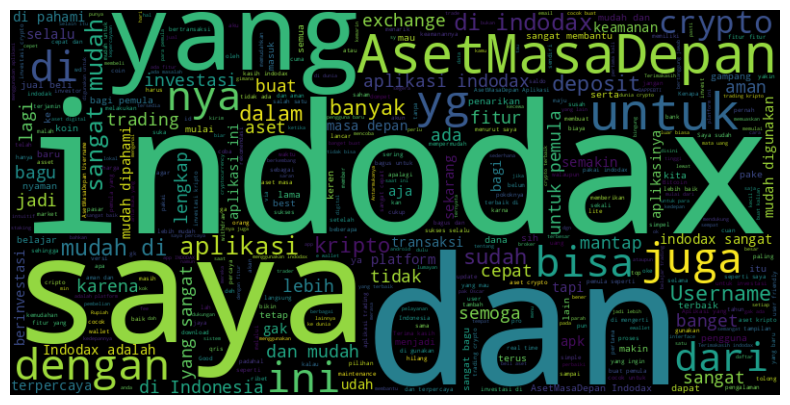

In [18]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
df['Review Text'] = df['Review Text'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['Review Text'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

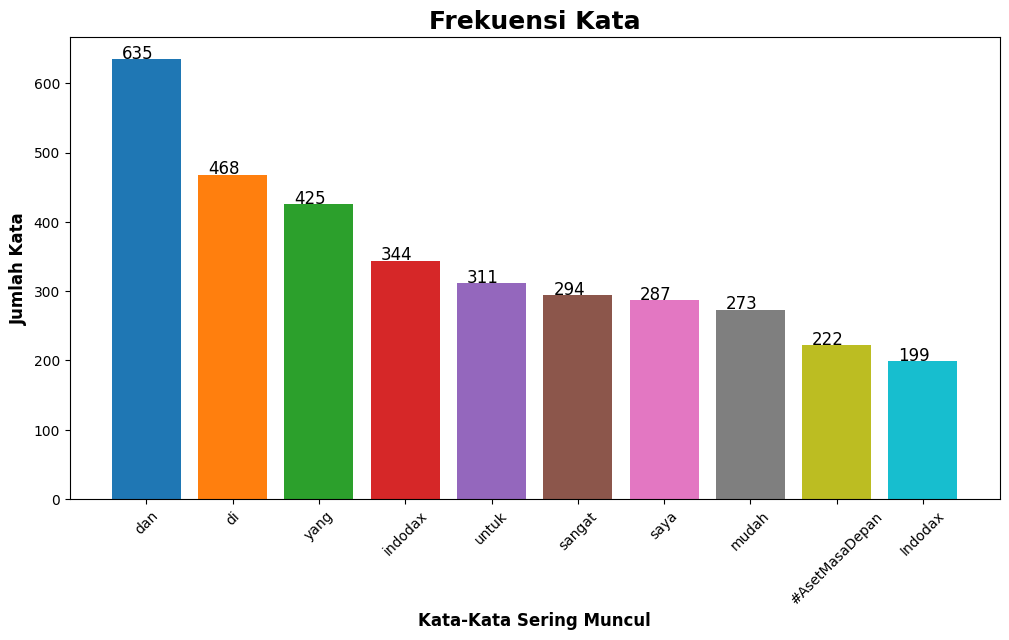

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["Review Text"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# **PROSES CLEANING**

In [20]:
import re
import string
import nltk

# Fungsi untuk menghapus URL
def remove_URL(tweet):
    if tweet is not None and isinstance(tweet, str):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus HTML
def remove_html(tweet):
    if tweet is not None and isinstance(tweet, str):
        html = re.compile(r'<.*?>')
        return html.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F700-\U0001F77F"  # alchemical symbols
            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
            u"\U0001F004-\U0001F0CF"  # Additional emoticons
            u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', tweet)
    else:
        return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        tweet = re.sub(r'\d', '', tweet)
    return tweet

df['cleaning'] = df['Review Text'].apply(lambda x: remove_URL(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_html(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoji(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_numbers(x))

df.head(10)

,Date,Username,Rating,Review Text,cleaning
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...
5,2024-10-09 15:25:17,ramdaniA hisyam (HISYAM06),4,Knp metode pembayaran uang elektronik seperti ...,Knp metode pembayaran uang elektronik seperti ...
6,2024-10-09 13:15:01,Nayim Hermanto,5,Saya pengguna indodak cuma kenapa aplikasinya ...,Saya pengguna indodak cuma kenapa aplikasinya ...
7,2024-10-09 13:12:47,Reizky DB,1,baru download mau login masukin email sama kat...,baru download mau login masukin email sama kat...
8,2024-10-09 13:04:43,HERWIDI YOTO,3,"Kenapa Aplikasinya Agak Lambat ya,setiap login...",Kenapa Aplikasinya Agak Lambat yasetiap login ...
9,2024-10-09 09:21:50,Yusuf Hasfiah,5,Indodax mantap,Indodax mantap


# **PROSES CASE FOLDING**

In [21]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...


# **NORMALISASI KATA**

In [22]:
import pandas as pd

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                # else:
                #     replaced_words.append('<karakter eksplisit>')
                #     kalimat_baku.append(word)
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [23]:
# Baca dataset
data =  pd.DataFrame(df[['Date','Username','Rating','Review Text','cleaning','case_folding']])
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...


In [24]:
# Baca kamus kata tidak baku
kamus_data = pd.read_excel("kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [25]:
# Terapkan fungsi penggantian kata tidak baku
data['normalisasi'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))
# data.head(100)

df =  pd.DataFrame(data[['Date','Username','Rating','Review Text','cleaning','case_folding','normalisasi']])

df.head(20)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...
5,2024-10-09 15:25:17,ramdaniA hisyam (HISYAM06),4,Knp metode pembayaran uang elektronik seperti ...,Knp metode pembayaran uang elektronik seperti ...,knp metode pembayaran uang elektronik seperti ...,kenapa metode pembayaran uang elektronik seper...
6,2024-10-09 13:15:01,Nayim Hermanto,5,Saya pengguna indodak cuma kenapa aplikasinya ...,Saya pengguna indodak cuma kenapa aplikasinya ...,saya pengguna indodak cuma kenapa aplikasinya ...,saya pengguna indodak cuma kenapa aplikasinya ...
7,2024-10-09 13:12:47,Reizky DB,1,baru download mau login masukin email sama kat...,baru download mau login masukin email sama kat...,baru download mau login masukin email sama kat...,baru download mau login memasuki email sama ka...
8,2024-10-09 13:04:43,HERWIDI YOTO,3,"Kenapa Aplikasinya Agak Lambat ya,setiap login...",Kenapa Aplikasinya Agak Lambat yasetiap login ...,kenapa aplikasinya agak lambat yasetiap login ...,kenapa aplikasinya agak lambat yasetiap login ...
9,2024-10-09 09:21:50,Yusuf Hasfiah,5,Indodax mantap,Indodax mantap,indodax mantap,indodax mantap


# **TOKENIZATION**

In [26]:
def tokenize(text):
    tokens = text.split()
    return tokens

df['tokenize'] = df['normalisasi'].apply(tokenize)

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"[saya, sudah, menggunakan, aplikasi, indodax, ..."
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"[uninstall, saja, ganti, apk, yang, lain, gass..."
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"[bagus, banget, buat, investasi, biss, di, tin..."
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"[depo, pakai, ewallet]"
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"[masih, pilihan, utama, dan, memiliki, integri..."


# **PROSES STOPWORD REMOVAL**

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['stopword removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"[saya, sudah, menggunakan, aplikasi, indodax, ...","[aplikasi, indodax, pengalaman, positif, antar..."
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"[uninstall, saja, ganti, apk, yang, lain, gass...","[uninstall, ganti, apk, gass, fee, usd, jaringan]"
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"[bagus, banget, buat, investasi, biss, di, tin...","[bagus, banget, investasi, biss, tingkatkan]"
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"[depo, pakai, ewallet]","[depo, pakai, ewallet]"
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"[masih, pilihan, utama, dan, memiliki, integri...","[pilihan, utama, memiliki, integritas, kerja, ..."


# ***PROSES STEAMING DATA***

In [29]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 13.1 MB/s eta 0:00:00


In [30]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['steming_data'] = df['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"[saya, sudah, menggunakan, aplikasi, indodax, ...","[aplikasi, indodax, pengalaman, positif, antar...",aplikasi indodax alam positif antarmuka intuit...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"[uninstall, saja, ganti, apk, yang, lain, gass...","[uninstall, ganti, apk, gass, fee, usd, jaringan]",uninstall ganti apk gass fee usd jaring
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"[bagus, banget, buat, investasi, biss, di, tin...","[bagus, banget, investasi, biss, tingkatkan]",bagus banget investasi biss tingkat
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"[depo, pakai, ewallet]","[depo, pakai, ewallet]",depo pakai ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"[masih, pilihan, utama, dan, memiliki, integri...","[pilihan, utama, memiliki, integritas, kerja, ...",pilih utama milik integritas kerja bagus


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 971 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              971 non-null    object
 1   Username          971 non-null    object
 2   Rating            971 non-null    int64 
 3   Review Text       971 non-null    object
 4   cleaning          971 non-null    object
 5   case_folding      971 non-null    object
 6   normalisasi       971 non-null    object
 7   tokenize          971 non-null    object
 8   stopword removal  971 non-null    object
 9   steming_data      971 non-null    object
dtypes: int64(1), object(9)
memory usage: 115.7+ KB


In [32]:
df.to_csv('skripsi_Hasil_Preprocessing_Data.csv',encoding='utf8', index=False);

**WORDCLOUD SETELAH PREPROCESSING**

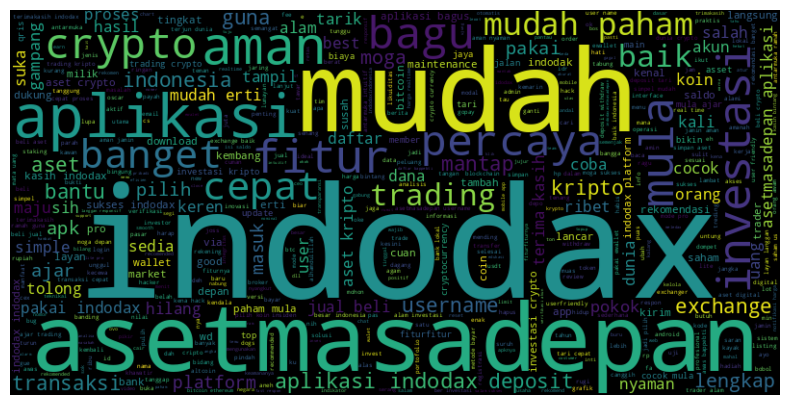

In [33]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


# Mengisi nilai NaN dengan string kosong ('')
# df['steming_data'] = df['steming_data'].fillna('')

# Menggabungkan teks dari kolom 'content'
text = ' '.join(df['steming_data'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp','ya'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

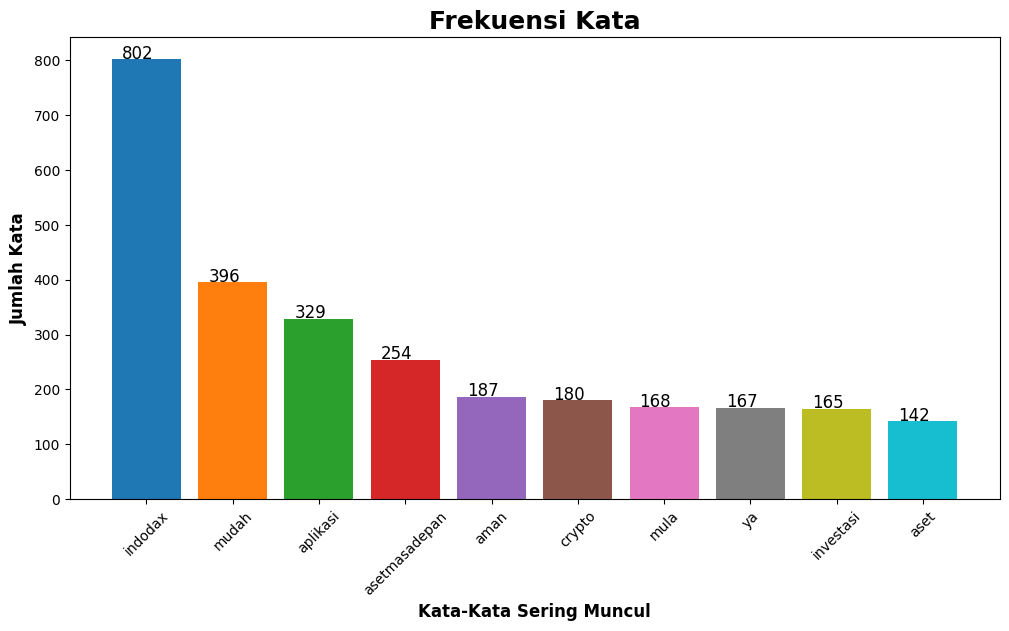

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(df["steming_data"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

# Definisikan palet warna
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

# Menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')


plt.show()

# ***LABELLING DATA***

In [36]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Preprocessing_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"['saya', 'sudah', 'menggunakan', 'aplikasi', '...","['aplikasi', 'indodax', 'pengalaman', 'positif...",aplikasi indodax alam positif antarmuka intuit...
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"['uninstall', 'saja', 'ganti', 'apk', 'yang', ...","['uninstall', 'ganti', 'apk', 'gass', 'fee', '...",uninstall ganti apk gass fee usd jaring
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"['bagus', 'banget', 'buat', 'investasi', 'biss...","['bagus', 'banget', 'investasi', 'biss', 'ting...",bagus banget investasi biss tingkat
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"['depo', 'pakai', 'ewallet']","['depo', 'pakai', 'ewallet']",depo pakai ewallet
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"['masih', 'pilihan', 'utama', 'dan', 'memiliki...","['pilihan', 'utama', 'memiliki', 'integritas',...",pilih utama milik integritas kerja bagus


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              971 non-null    object
 1   Username          971 non-null    object
 2   Rating            971 non-null    int64 
 3   Review Text       971 non-null    object
 4   cleaning          965 non-null    object
 5   case_folding      965 non-null    object
 6   normalisasi       964 non-null    object
 7   tokenize          971 non-null    object
 8   stopword removal  971 non-null    object
 9   steming_data      962 non-null    object
dtypes: int64(1), object(9)
memory usage: 76.0+ KB


In [38]:
df = data.dropna()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 0 to 970
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              962 non-null    object
 1   Username          962 non-null    object
 2   Rating            962 non-null    int64 
 3   Review Text       962 non-null    object
 4   cleaning          962 non-null    object
 5   case_folding      962 non-null    object
 6   normalisasi       962 non-null    object
 7   tokenize          962 non-null    object
 8   stopword removal  962 non-null    object
 9   steming_data      962 non-null    object
dtypes: int64(1), object(9)
memory usage: 82.7+ KB


In [43]:
import pandas as pd

# Fungsi untuk menentukan sentimen
def determine_sentiment(text):
    positive_count = sum(1 for word in text.split() if word in positive_lexicon)
    negative_count = sum(1 for word in text.split() if word in negative_lexicon)
    if positive_count > negative_count:
        return "Positif"
    elif positive_count < negative_count:
        return "Negatif"

# Baca kamus leksikon positif dan negatif
positive_lexicon = set(pd.read_csv("positive.tsv", sep="\t", header=None)[0])
negative_lexicon = set(pd.read_csv("negative.tsv", sep="\t", header=None)[0])

def replace_none_sentiment(sentiments):
    replace_flag = "Positif"
    for i in range(len(sentiments)):
        if sentiments[i] is None:
            sentiments[i] = replace_flag
            replace_flag = "Negatif" if replace_flag == "Positif" else "Positif"
    return sentiments


df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())

df.head()

<ipython-input-43-c843614cb543>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['steming_data'].apply(determine_sentiment)
<ipython-input-43-c843614cb543>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = replace_none_sentiment(df['Sentiment'].tolist())


,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"['saya', 'sudah', 'menggunakan', 'aplikasi', '...","['aplikasi', 'indodax', 'pengalaman', 'positif...",aplikasi indodax alam positif antarmuka intuit...,Negatif
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"['uninstall', 'saja', 'ganti', 'apk', 'yang', ...","['uninstall', 'ganti', 'apk', 'gass', 'fee', '...",uninstall ganti apk gass fee usd jaring,Positif
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"['bagus', 'banget', 'buat', 'investasi', 'biss...","['bagus', 'banget', 'investasi', 'biss', 'ting...",bagus banget investasi biss tingkat,Positif
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"['depo', 'pakai', 'ewallet']","['depo', 'pakai', 'ewallet']",depo pakai ewallet,Positif
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"['masih', 'pilihan', 'utama', 'dan', 'memiliki...","['pilihan', 'utama', 'memiliki', 'integritas',...",pilih utama milik integritas kerja bagus,Positif


<ipython-input-44-03d100c1b0d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


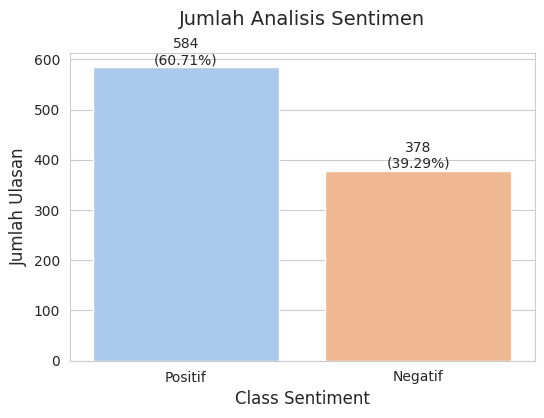

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_count = df['Sentiment'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Ulasan', fontsize=12)

total = len(df['Sentiment'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

In [45]:
df.to_csv('skripsi_Hasil_Labelling_Data.csv',encoding='utf8', index=False)

In [46]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.head(5)

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"['saya', 'sudah', 'menggunakan', 'aplikasi', '...","['aplikasi', 'indodax', 'pengalaman', 'positif...",aplikasi indodax alam positif antarmuka intuit...,Negatif
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"['uninstall', 'saja', 'ganti', 'apk', 'yang', ...","['uninstall', 'ganti', 'apk', 'gass', 'fee', '...",uninstall ganti apk gass fee usd jaring,Positif
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"['bagus', 'banget', 'buat', 'investasi', 'biss...","['bagus', 'banget', 'investasi', 'biss', 'ting...",bagus banget investasi biss tingkat,Positif
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"['depo', 'pakai', 'ewallet']","['depo', 'pakai', 'ewallet']",depo pakai ewallet,Positif
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"['masih', 'pilihan', 'utama', 'dan', 'memiliki...","['pilihan', 'utama', 'memiliki', 'integritas',...",pilih utama milik integritas kerja bagus,Positif


In [47]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_Negative = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_Positive = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [48]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

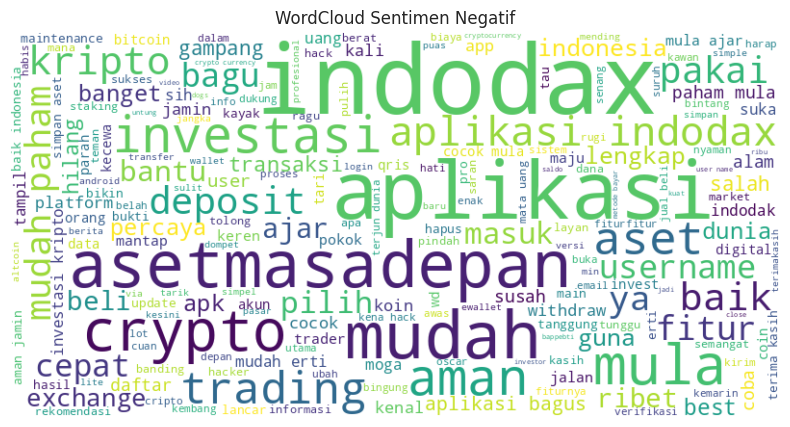

In [49]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_Negative, 'WordCloud Sentimen Negatif')

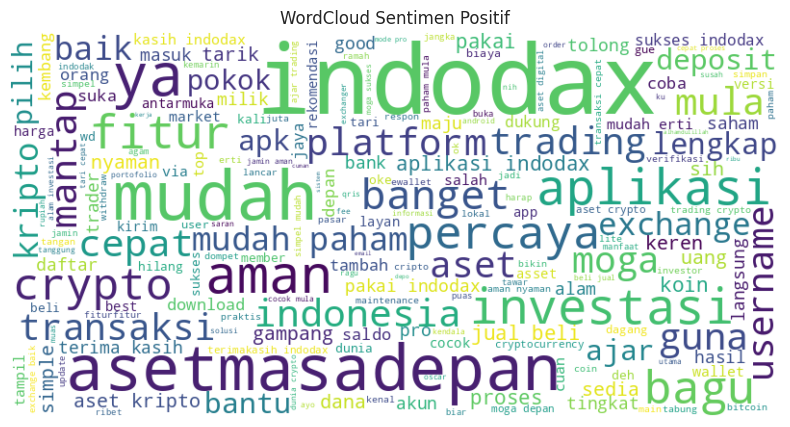

In [50]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_Positive, 'WordCloud Sentimen Positif')

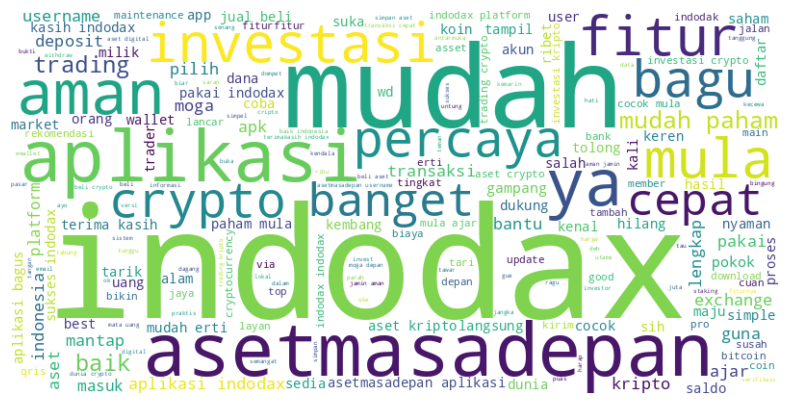

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))

# Menampilkan word cloud dengan interpolasi gambar bilinear
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# **Term Frequency-Inverse Document Frequency (TF-IDF)**

In [52]:
!pip install pandas scikit-learn

In [54]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca dataset dari file CSV
df = pd.read_csv('skripsi_Hasil_Labelling_Data.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              962 non-null    object
 1   Username          962 non-null    object
 2   Rating            962 non-null    int64 
 3   Review Text       962 non-null    object
 4   cleaning          962 non-null    object
 5   case_folding      962 non-null    object
 6   normalisasi       962 non-null    object
 7   tokenize          962 non-null    object
 8   stopword removal  962 non-null    object
 9   steming_data      962 non-null    object
 10  Sentiment         962 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.8+ KB


In [56]:
data = df.dropna()

In [57]:
# Menginisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer()

# Menghitung TF-IDF
tfidf_matrix = vectorizer.fit_transform(data['steming_data'])

# Mengonversi hasil ke dalam DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Menyimpan hasil ke file CSV
tfidf_df.to_csv('tfidf_output.csv', index=False)

In [58]:
top_n = 10  # Jumlah kata teratas yang akan ditampilkan

# Mengambil kata-kata dengan nilai TF-IDF tertinggi di setiap dokumen
top_tfidf_words = tfidf_df.apply(lambda x: x.nlargest(top_n).index.tolist(), axis=1)
top_tfidf_values = tfidf_df.apply(lambda x: x.nlargest(top_n).values.tolist(), axis=1)

# Menggabungkan kata-kata dengan nilai TF-IDF tertinggi ke dalam satu DataFrame
top_tfidf_df = pd.DataFrame({
    'Top Words': top_tfidf_words,
    'Top Values': top_tfidf_values
})

In [59]:
top_tfidf_df.head(50)

,Top Words,Top Values
0,"[ozevadiana, diversifikasi, ambil, positif, ba...","[0.2662931549235184, 0.25124870828165374, 0.23..."
1,"[gass, usd, uninstall, ganti, jaring, fee, apk...","[0.43503137848686124, 0.43503137848686124, 0.4..."
2,"[biss, tingkat, banget, bagus, investasi, aami...","[0.6917294036467877, 0.4747438832693941, 0.343..."
3,"[depo, ewallet, pakai, aamiiiiin, abang, aben,...","[0.6808953914798288, 0.5976986769952695, 0.423..."
4,"[integritas, kerja, utama, milik, pilih, bagus...","[0.5148648235837073, 0.46652601766910873, 0.43..."
5,"[ovogpaydana, elektronik, dll, metode, up, bay...","[0.4156975322078584, 0.3922123647267336, 0.362..."
6,"[dimarket, loding, ter, kayak, indodak, gampan...","[0.46453510952040133, 0.43829082370517025, 0.4..."
7,"[sandi, login, pasuk, pw, email, download, tol...","[0.597799733738852, 0.5366069695331379, 0.2988..."
8,"[yasetiap, loding, login, lambat, aplikasi, aa...","[0.5429896789777467, 0.5123130389611826, 0.459..."
9,"[mantap, indodax, aamiiiiin, abang, aben, acad...","[0.9133511865572314, 0.40717270293389934, 0.0,..."


# **Spliting Data**

In [60]:
import pandas as pd

data = pd.read_csv("skripsi_Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2024-10-10 05:06:41,Eva Nur Diana,5,Saya sudah menggunakan aplikasi Indodax 3.0 se...,Saya sudah menggunakan aplikasi Indodax selam...,saya sudah menggunakan aplikasi indodax selam...,saya sudah menggunakan aplikasi indodax selama...,"['saya', 'sudah', 'menggunakan', 'aplikasi', '...","['aplikasi', 'indodax', 'pengalaman', 'positif...",aplikasi indodax alam positif antarmuka intuit...,Negatif
1,2024-10-10 03:53:46,putra puka,1,"Uninstall aja ganti apk yg lain, gass fee seka...",Uninstall aja ganti apk yg lain gass fee sekar...,uninstall aja ganti apk yg lain gass fee sekar...,uninstall saja ganti apk yang lain gass fee se...,"['uninstall', 'saja', 'ganti', 'apk', 'yang', ...","['uninstall', 'ganti', 'apk', 'gass', 'fee', '...",uninstall ganti apk gass fee usd jaring,Positif
2,2024-10-10 03:03:04,Arpan Hadi,5,Bagus bgt buat investasi biss di tingkatkan lagi,Bagus bgt buat investasi biss di tingkatkan lagi,bagus bgt buat investasi biss di tingkatkan lagi,bagus banget buat investasi biss di tingkatkan...,"['bagus', 'banget', 'buat', 'investasi', 'biss...","['bagus', 'banget', 'investasi', 'biss', 'ting...",bagus banget investasi biss tingkat,Positif
3,2024-10-09 22:44:19,L K,1,Gabisa depo pake ewallet,Gabisa depo pake ewallet,gabisa depo pake ewallet,depo pakai ewallet,"['depo', 'pakai', 'ewallet']","['depo', 'pakai', 'ewallet']",depo pakai ewallet,Positif
4,2024-10-09 17:20:37,Utha Bredar,5,Masih pilihan utama dan memiliki integritas yg...,Masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas yg...,masih pilihan utama dan memiliki integritas ya...,"['masih', 'pilihan', 'utama', 'dan', 'memiliki...","['pilihan', 'utama', 'memiliki', 'integritas',...",pilih utama milik integritas kerja bagus,Positif


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              962 non-null    object
 1   Username          962 non-null    object
 2   Rating            962 non-null    int64 
 3   Review Text       962 non-null    object
 4   cleaning          962 non-null    object
 5   case_folding      962 non-null    object
 6   normalisasi       962 non-null    object
 7   tokenize          962 non-null    object
 8   stopword removal  962 non-null    object
 9   steming_data      962 non-null    object
 10  Sentiment         962 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.8+ KB


In [62]:
df = data.dropna()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              962 non-null    object
 1   Username          962 non-null    object
 2   Rating            962 non-null    int64 
 3   Review Text       962 non-null    object
 4   cleaning          962 non-null    object
 5   case_folding      962 non-null    object
 6   normalisasi       962 non-null    object
 7   tokenize          962 non-null    object
 8   stopword removal  962 non-null    object
 9   steming_data      962 non-null    object
 10  Sentiment         962 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.8+ KB


# **Split Data 80 dan 20**

In [64]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.2, random_state=42)

In [70]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi_train_data.csv', index=False)

In [71]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi_test_data.csv', index=False)

In [72]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 769
Jumlah Data Uji: 193


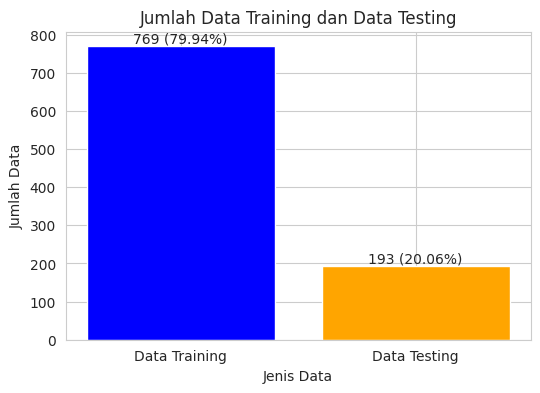

In [73]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **Split Data 70 dan 30**

In [74]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.3, random_state=42)

In [78]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi70dan30_train_data.csv', index=False)

In [79]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi70dan30_test_data.csv', index=False)

In [80]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 673
Jumlah Data Uji: 289


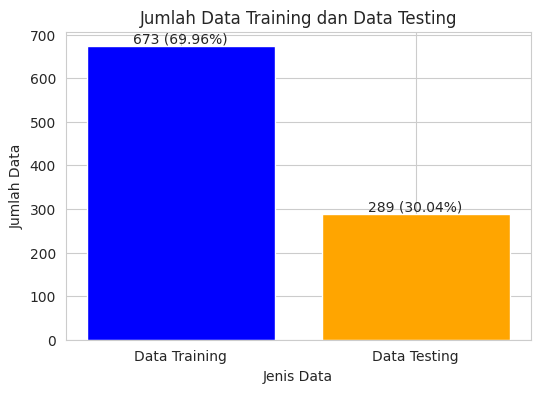

In [81]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **Split Data 90 dan 10**

In [82]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(df['steming_data'], df['Sentiment'], test_size=0.1, random_state=42)

In [83]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('skripsi90dan10_train_data.csv', index=False)

In [84]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('skripsi90dan10_test_data.csv', index=False)

In [85]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 865
Jumlah Data Uji: 97


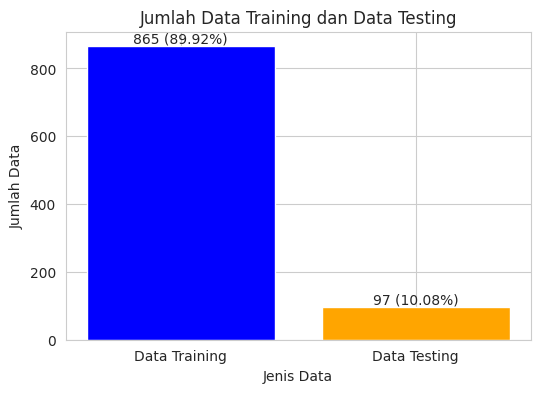

In [86]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(6, 4))
bars = plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.7, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Training dan Data Testing')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()

# **ALGORITMA NAIVE BAYES CLASIFIER**

In [160]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df_test = pd.read_csv('test_data.csv')
df_test.head()

,text,sentiment
0,salam sukses indodax,Positif
1,maintenance indodax kena serang hacker kesini ...,Negatif
2,indodax baik username fransmidun asetmasadepan,Negatif
3,rekomendasi banget aset kripto mata uang asing...,Positif
4,nyaman banget sih pakai indodax tenang bawaany...,Positif


In [161]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_test['text']
y = df_test['sentiment']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

# Membuat dan melatih model Multinomial Naive Bayes
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_vect, y)

# Melakukan prediksi pada data yang sama
y_pred = multinomial_nb.predict(X_vect)

# Evaluasi model
accuracy = accuracy_score(y, y_pred)
print(f"Multinomial Naive Bayes Accuracy: {accuracy}")
print()

cm = confusion_matrix(y, y_pred)
print(f"Multinomial Naive Bayes Confusion Matrix:\n{cm}")
print()

cr = classification_report(y, y_pred)
print(f"Multinomial Naive Bayes Classification Report:\n{cr}\n")

Multinomial Naive Bayes Accuracy: 0.9533678756476683

Multinomial Naive Bayes Confusion Matrix:
[[ 74   6]
 [  3 110]]

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Negatif       0.96      0.93      0.94        80
     Positif       0.95      0.97      0.96       113

    accuracy                           0.95       193
   macro avg       0.95      0.95      0.95       193
weighted avg       0.95      0.95      0.95       193




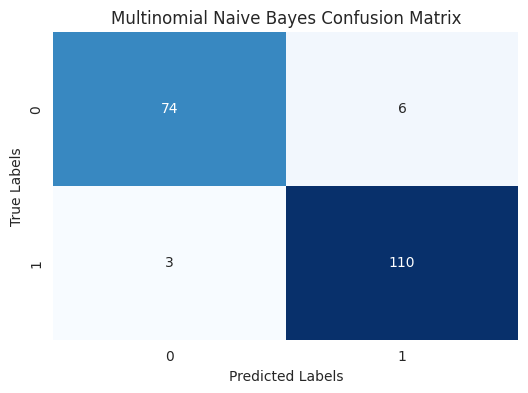

In [162]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **MELATIH DAN EVALUASI MODEL DATA TRAINING**

In [163]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [164]:
df = pd.read_csv('train_data.csv')
df.head()

,text,sentiment
0,inti bagus,Negatif
1,nyangkut lum bikin guna miliarder aplikasi bin...,Negatif
2,aplikasi kripto langsung jatuh cinta pakai use...,Positif
3,aplikasi gampang paham ribet pakai pokokny mantap,Negatif
4,indodax investasi kripto mudah desain antarmuk...,Positif


In [166]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df['text']
y = df['sentiment']

vectorizer = CountVectorizer()
X_vect = vectorizer.fit_transform(X)

multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_vect, y)

models = {
    "Multinomial Naive Bayes": multinomial_nb,
}

for model_name, model in models.items():
    y_pred = model.predict(X_vect.toarray())

    # Akurasi
    accuracy = accuracy_score(y, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print()

    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    print(f"{model_name} Confusion Matrix:\n{cm}")
    print()

    # Classification report
    cr = classification_report(y, y_pred)
    print(f"{model_name} Classification Report:\n{cr}\n")


Multinomial Naive Bayes Accuracy: 0.9271781534460338

Multinomial Naive Bayes Confusion Matrix:
[[246  52]
 [  4 467]]

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Negatif       0.98      0.83      0.90       298
     Positif       0.90      0.99      0.94       471

    accuracy                           0.93       769
   macro avg       0.94      0.91      0.92       769
weighted avg       0.93      0.93      0.93       769




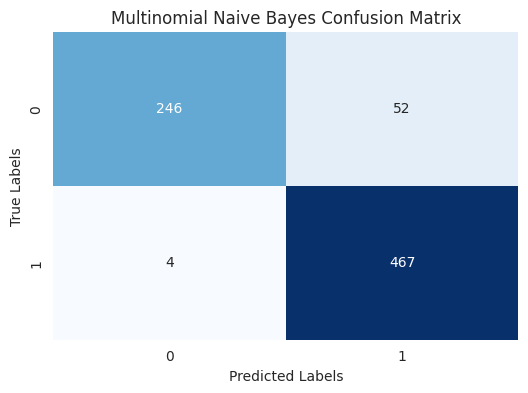

In [167]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Multinomial Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# ***WORDCLOUD***

In [168]:
import pandas as pd

data = pd.read_csv("belajar_Hasil_Labelling_Data.csv")
data.head()

,Date,Username,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword removal,steming_data,Sentiment
0,2024-10-09 15:25:17,ramdaniA hisyam (HISYAM06),4,Knp metode pembayaran uang elektronik seperti ...,Knp metode pembayaran uang elektronik seperti ...,knp metode pembayaran uang elektronik seperti ...,kenapa metode pembayaran uang elektronik seper...,"['kenapa', 'metode', 'pembayaran', 'uang', 'el...","['metode', 'pembayaran', 'uang', 'elektronik',...",metode bayar uang elektronik ovogpaydana dll s...,Negatif
1,2024-10-09 13:15:01,Nayim Hermanto,5,Saya pengguna indodak cuma kenapa aplikasinya ...,Saya pengguna indodak cuma kenapa aplikasinya ...,saya pengguna indodak cuma kenapa aplikasinya ...,saya pengguna indodak cuma kenapa aplikasinya ...,"['saya', 'pengguna', 'indodak', 'cuma', 'kenap...","['pengguna', 'indodak', 'aplikasinya', 'loding...",guna indodak aplikasi loding ter kayak dimarke...,Negatif
2,2024-10-09 13:12:47,Reizky DB,1,baru download mau login masukin email sama kat...,baru download mau login masukin email sama kat...,baru download mau login masukin email sama kat...,baru download mau login memasuki email sama ka...,"['baru', 'download', 'mau', 'login', 'memasuki...","['download', 'login', 'memasuki', 'email', 'sa...",download login pasuk email sandi tolong mudah ...,Positif
3,2024-10-09 13:04:43,HERWIDI YOTO,3,"Kenapa Aplikasinya Agak Lambat ya,setiap login...",Kenapa Aplikasinya Agak Lambat yasetiap login ...,kenapa aplikasinya agak lambat yasetiap login ...,kenapa aplikasinya agak lambat yasetiap login ...,"['kenapa', 'aplikasinya', 'agak', 'lambat', 'y...","['aplikasinya', 'lambat', 'yasetiap', 'login',...",aplikasi lambat yasetiap login loding,Positif
4,2024-10-09 09:21:50,Yusuf Hasfiah,5,Indodax mantap,Indodax mantap,indodax mantap,indodax mantap,"['indodax', 'mantap']","['indodax', 'mantap']",indodax mantap,Positif


In [169]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan dataset berdasarkan sentimen
sentimen_negatif = data[data['Sentiment'] == 'Negatif']['steming_data'].str.cat(sep=' ')
sentimen_positif = data[data['Sentiment'] == 'Positif']['steming_data'].str.cat(sep=' ')

In [170]:
# Fungsi untuk membuat dan menampilkan WordCloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_font_size=100, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

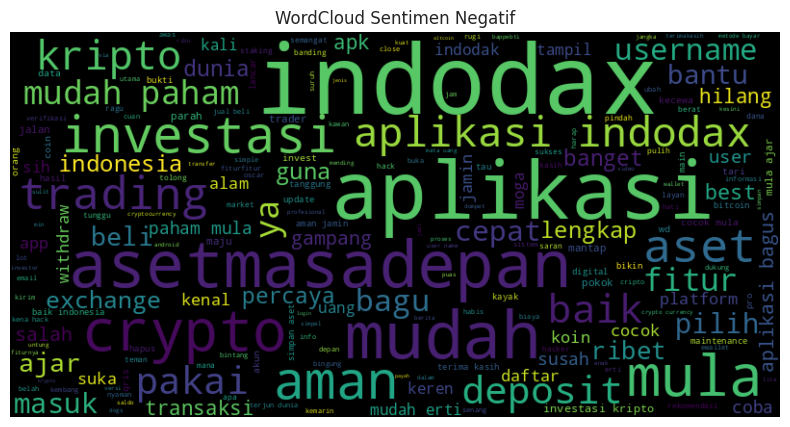

In [171]:
# Membuat WordCloud untuk sentimen negatif
create_wordcloud(sentimen_negatif, 'WordCloud Sentimen Negatif')

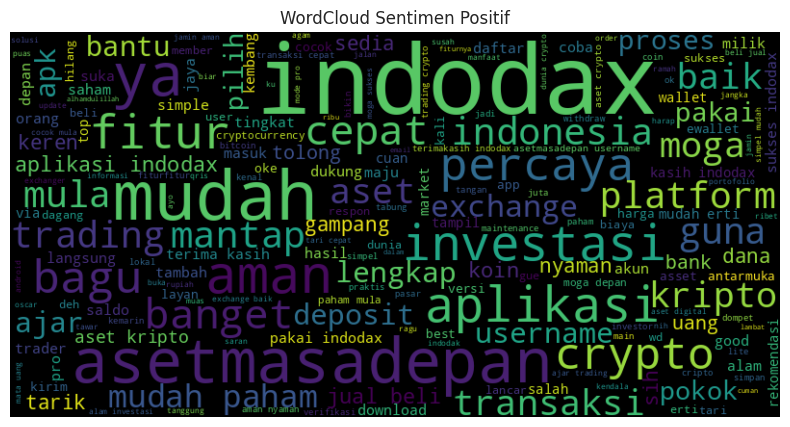

In [172]:
# Membuat WordCloud untuk sentimen positif
create_wordcloud(sentimen_positif, 'WordCloud Sentimen Positif')

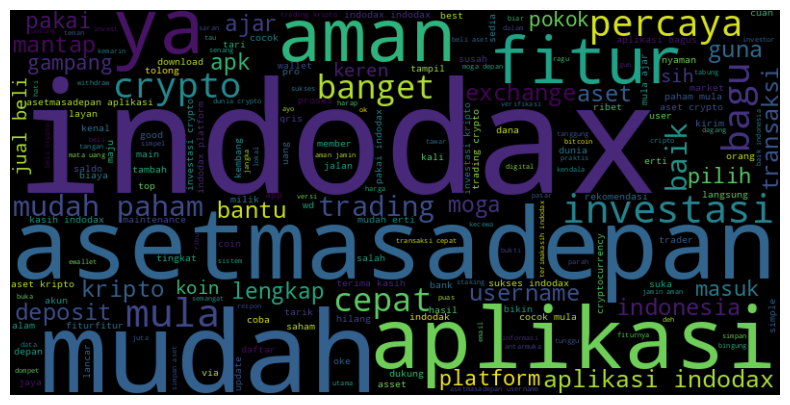

In [173]:
text = ' '.join(data['steming_data'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else ''))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

# **RANTING**

In [174]:
import pandas as pd

data = pd.read_csv("belajar_Hasil_Labelling_Data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              962 non-null    object
 1   Username          962 non-null    object
 2   Rating            962 non-null    int64 
 3   Review Text       962 non-null    object
 4   cleaning          962 non-null    object
 5   case_folding      962 non-null    object
 6   normalisasi       962 non-null    object
 7   tokenize          962 non-null    object
 8   stopword removal  962 non-null    object
 9   steming_data      962 non-null    object
 10  Sentiment         962 non-null    object
dtypes: int64(1), object(10)
memory usage: 82.8+ KB


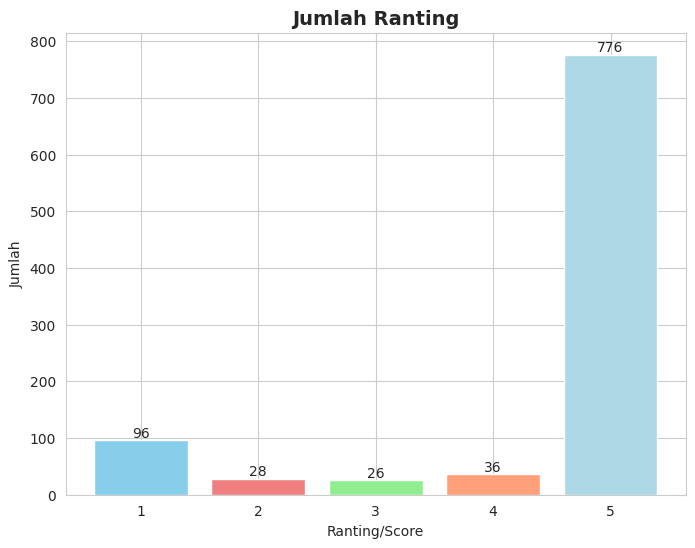

In [175]:
import matplotlib.pyplot as plt

rating_counts = data['Rating'].value_counts()
rating_counts = rating_counts.sort_index()

colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color=colors)
plt.title('Jumlah Ranting', fontsize=14, fontweight='bold')
plt.xlabel('Ranting/Score')
plt.ylabel('Jumlah')
plt.xticks(rating_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

plt.show()